In [2]:
%cd ..

d:\Repositories\other\nbody


In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from barnes_hut.BHTree import Tracker, Body

plt.style.use('dark_background')
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.rcParams['animation.embed_limit'] = 2**128
plt.ioff()

MovieWriter ffmpeg unavailable; using Pillow instead.


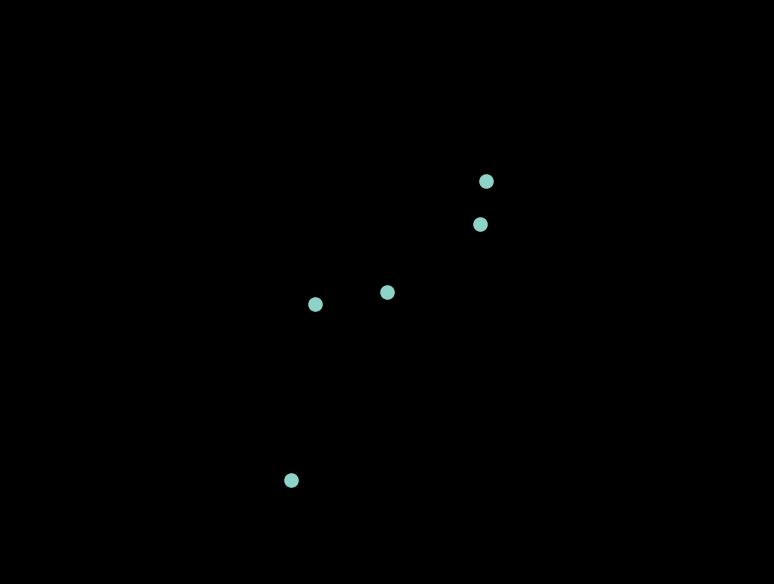

In [9]:
SIZE = np.float64(2.5e12)
BODIES = [Body(1.4960e+11 + 0j,  0 + 2.9800e+04j,  5.9740e+24),
          Body(2.2790e+11 + 0j, 0 + 2.4100e+04j, 6.4190e+23),
          Body(5.7900e+10 + 0j, 0 + 4.7900e+04j, 3.3020e+23),
          Body(0, 0, 1.9890e+30),
          Body(1.0820e+11, 3.5000e+04j, 4.8690e+24)]

T = Tracker(BODIES, SIZE, dt=1000)

fig = plt.figure()
axes = plt.axes(xlim=(-SIZE / 8, SIZE / 8), ylim=(-SIZE / 8, SIZE / 8))
pic = axes.scatter([], [])
plt.axis('off')

def init():
    return pic,

def animate(i):
    T.update(N=100)
    data = T.get_all()
    pic.set_offsets(list(zip(data.real, data.imag)))
    return pic,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=1000, interval=1, blit=True)

anim.save("output/solar.gif")